# SMA Crossover Strategy

In [8]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web

yf.pdr_override()
plt.style.use('seaborn')

/var/folders/0_/gy464vds467drwq060df5l280000gn/T/ipykernel_25201/70914012.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [9]:
# Buscando dados

ticket = 'EURUSD=X'

df = web.get_data_yahoo(ticket, start='2004-1-1', end='2020-1-1')

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0
2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0
2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0
...,...,...,...,...,...,...
2019-12-25,1.109139,1.110864,1.107788,1.109016,1.109016,0
2019-12-26,1.109509,1.110494,1.108279,1.109545,1.109545,0
2019-12-27,1.110124,1.118068,1.110000,1.110112,1.110112,0


In [10]:
# Definindo médias móveis

sma_s = 50
sma_l = 200

df['SMA_S'] = df['Adj Close'].rolling(sma_s).mean()
df['SMA_L'] = df['Adj Close'].rolling(sma_l).mean()

df

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L
Date,,,,,,,,
2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0,NaN,NaN
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0,NaN,NaN
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0,NaN,NaN
2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0,NaN,NaN
2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-25,1.109139,1.110864,1.107788,1.109016,1.109016,0,1.108611,1.115074
2019-12-26,1.109509,1.110494,1.108279,1.109545,1.109545,0,1.108653,1.114944
2019-12-27,1.110124,1.118068,1.110000,1.110112,1.110112,0,1.108600,1.114781


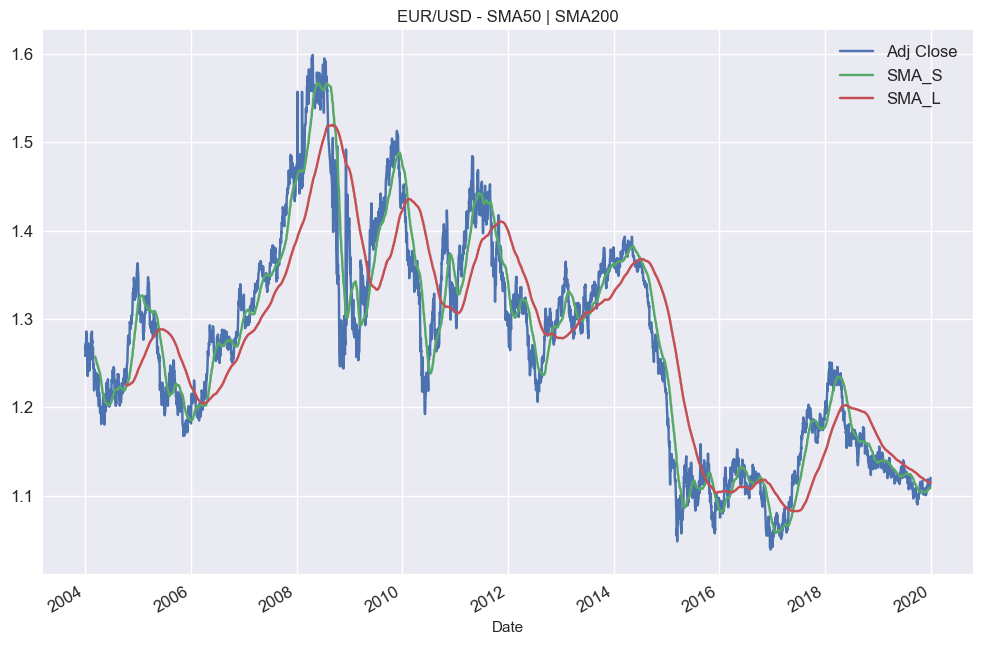

In [15]:
# Plotando gráfico

df[['Adj Close', 'SMA_S', 'SMA_L']].plot(figsize=(12, 8), title='EUR/USD - SMA{} | SMA{}'.format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()


In [16]:
df.dropna(inplace=True)

df

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L
Date,,,,,,,,
2004-10-06,1.231603,1.232407,1.226001,1.228094,1.228094,0,1.221318,1.226222
2004-10-07,1.228199,1.231300,1.227702,1.229906,1.229906,0,1.221840,1.226081
2004-10-08,1.230194,1.243503,1.228894,1.241003,1.241003,0,1.222628,1.225995
2004-10-11,1.241203,1.241604,1.237394,1.238405,1.238405,0,1.223352,1.225843
2004-10-12,1.238405,1.238697,1.229302,1.232104,1.232104,0,1.223888,1.225643
...,...,...,...,...,...,...,...,...
2019-12-25,1.109139,1.110864,1.107788,1.109016,1.109016,0,1.108611,1.115074
2019-12-26,1.109509,1.110494,1.108279,1.109545,1.109545,0,1.108653,1.114944
2019-12-27,1.110124,1.118068,1.110000,1.110112,1.110112,0,1.108600,1.114781


In [17]:
# Gerando sinais de compra e venda

df['position'] = np.where(df['SMA_S'] > df['SMA_L'], 1, -1)

df

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L,position
Date,,,,,,,,,
2004-10-06,1.231603,1.232407,1.226001,1.228094,1.228094,0,1.221318,1.226222,-1
2004-10-07,1.228199,1.231300,1.227702,1.229906,1.229906,0,1.221840,1.226081,-1
2004-10-08,1.230194,1.243503,1.228894,1.241003,1.241003,0,1.222628,1.225995,-1
2004-10-11,1.241203,1.241604,1.237394,1.238405,1.238405,0,1.223352,1.225843,-1
2004-10-12,1.238405,1.238697,1.229302,1.232104,1.232104,0,1.223888,1.225643,-1
...,...,...,...,...,...,...,...,...,...
2019-12-25,1.109139,1.110864,1.107788,1.109016,1.109016,0,1.108611,1.115074,-1
2019-12-26,1.109509,1.110494,1.108279,1.109545,1.109545,0,1.108653,1.114944,-1
2019-12-27,1.110124,1.118068,1.110000,1.110112,1.110112,0,1.108600,1.114781,-1


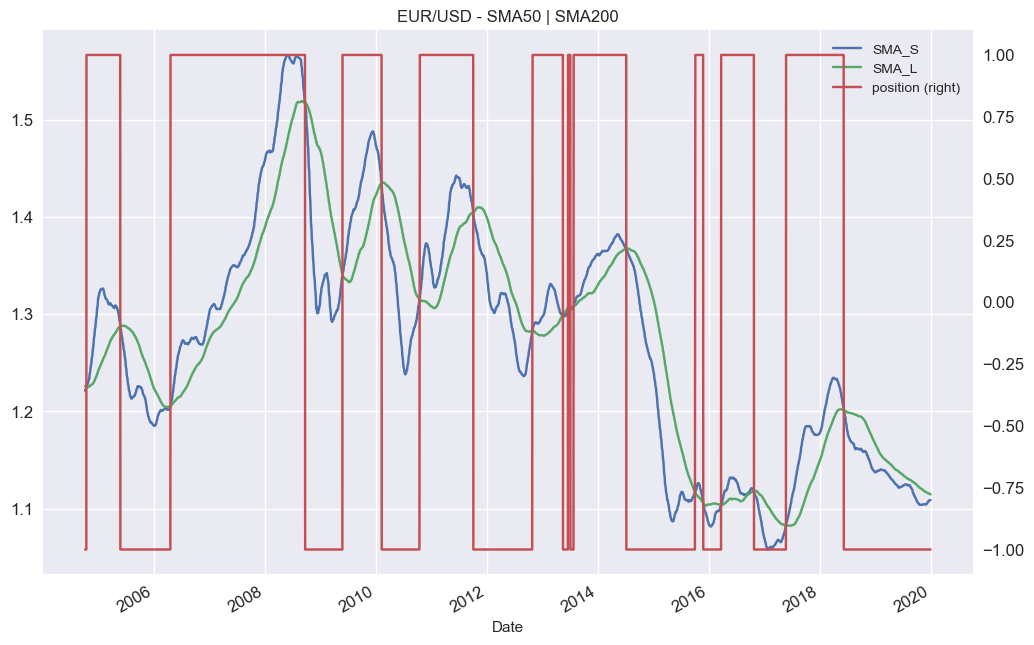

In [19]:
# Plotando gráfico com sinais de compra e venda

df.loc[:, ['SMA_S', 'SMA_L', 'position']].plot(
                                        figsize=(12, 8), 
                                        fontsize=12, 
                                        secondary_y='position', 
                                        title='EUR/USD - SMA{} | SMA{}'.format(sma_s, sma_l))

plt.show()

### Metrics

In [20]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L,position
Date,,,,,,,,,
2004-10-06,1.231603,1.232407,1.226001,1.228094,1.228094,0,1.221318,1.226222,-1
2004-10-07,1.228199,1.231300,1.227702,1.229906,1.229906,0,1.221840,1.226081,-1
2004-10-08,1.230194,1.243503,1.228894,1.241003,1.241003,0,1.222628,1.225995,-1
2004-10-11,1.241203,1.241604,1.237394,1.238405,1.238405,0,1.223352,1.225843,-1
2004-10-12,1.238405,1.238697,1.229302,1.232104,1.232104,0,1.223888,1.225643,-1
...,...,...,...,...,...,...,...,...,...
2019-12-25,1.109139,1.110864,1.107788,1.109016,1.109016,0,1.108611,1.115074,-1
2019-12-26,1.109509,1.110494,1.108279,1.109545,1.109545,0,1.108653,1.114944,-1
2019-12-27,1.110124,1.118068,1.110000,1.110112,1.110112,0,1.108600,1.114781,-1


In [23]:
df['returns'] = np.log(df['Adj Close'].div(df['Adj Close'].shift(1)))

In [24]:
df['strategy'] = df['position'].shift(1) * df['returns']

In [26]:
df.dropna(inplace=True)

In [27]:
# Retornos absolutos

df[['returns', 'strategy']].sum()

returns    -0.091929
strategy    0.249794
dtype: float64

In [28]:
df[['returns', 'strategy']].sum().apply(np.exp)

returns     0.912169
strategy    1.283761
dtype: float64

In [30]:
# Retorno anualizado

df[['returns', 'strategy']].mean() * 252

returns    -0.005872
strategy    0.015956
dtype: float64

In [31]:
# Risco anualizado

df[['returns', 'strategy']].std() * np.sqrt(252)

returns     0.121823
strategy    0.121819
dtype: float64